<div class="alert alert-block alert-success">
    
    
## <center> Intelligent Virtual Assistant</center>
### <center> Utilizing OpenAI </center>



**Author: Atef Bader, PhD**
<br>
**Last Edit: 8/6/2023**
<br>
<br>
    
    
</div>

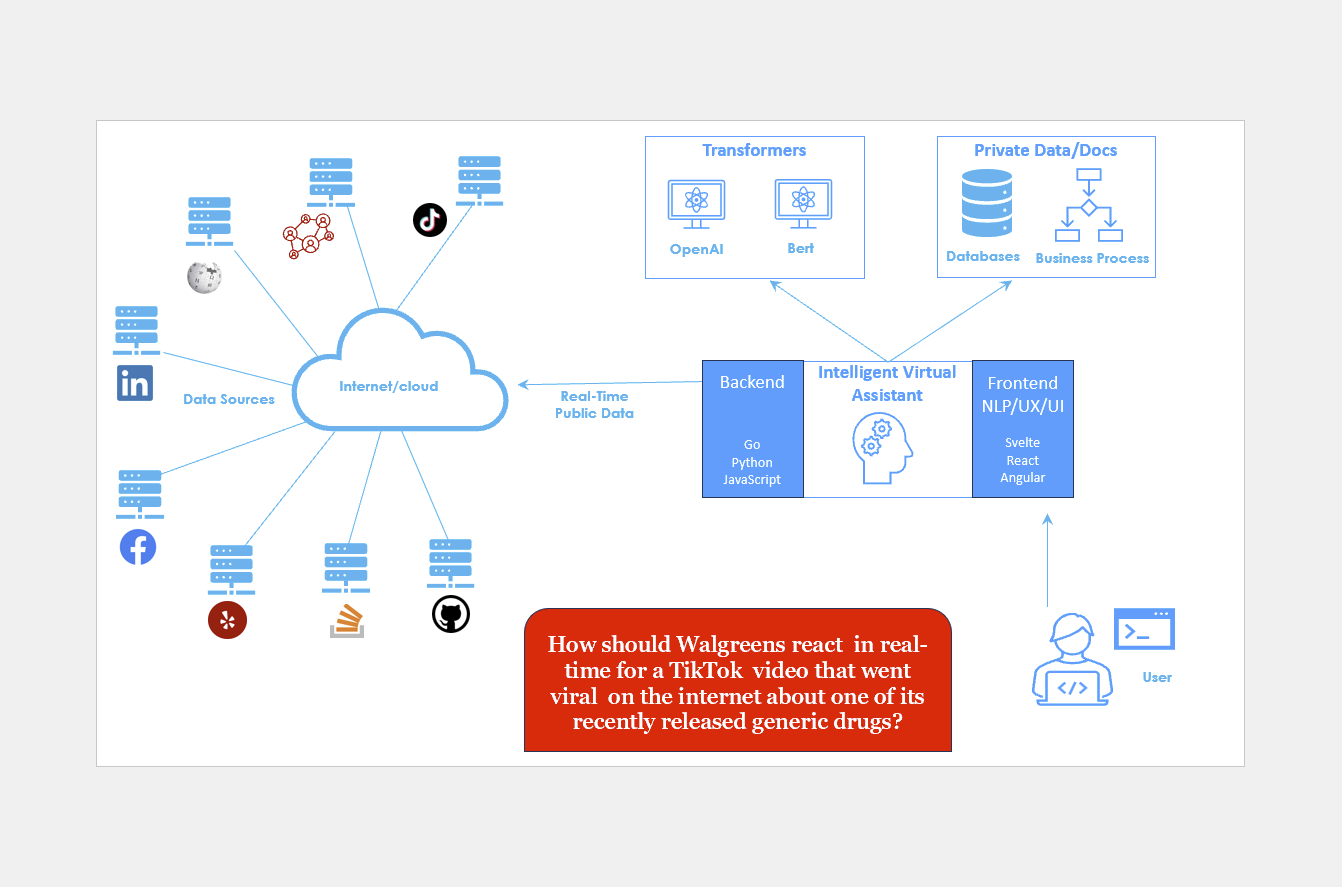




<div class="alert alert-block alert-warning">

    
  

## Learning Objectives:

- Develop an **Intelligent Virtual Assistant** that will :
    - Use private/personal/real-time data (daily tasks, calendar, diet, exercise, personal notes/documents, sports scores, etc.)
	- Be domain/goal specific (retailer, financial application, insurance applications, etc.)
	- Use function_call of LLM/GPT API (OpenAI) to connect GPT's capabilities with external tools and APIs.
    - Convert natural language into API calls or database queries
    - Answer natural or programming langauge questions
    - Use OpenAI to Generate, Extract, and Transform Natural or Code text 
    - Execute personal/business process workflow utlizing real-time and geospatial data; for example, booking a flight, ordering food, etc.

    </br>
- Unlike Apple Siri, Amazon Alexa, Google Assistant, or a general internet Chatbot,  our  **Intelligent Virtual Assistant**  would need to generate code and interact with external tools for certain **tasks** to be completed
    
</br>
</br>

</div>

<hr style="border:5px solid orange"> </hr>


<div class="alert alert-info">


    

## Why Build/Use OpenAI Plugins, function_call, and functions?


</br>
    
- The AI model acts as an intelligent API caller. Given an API spec and a natural-language description of when to use the API, the model proactively calls the API to perform actions. For instance, if a user asks, "Where should I stay in Paris for a couple nights?", the model may choose to call a hotel reservation plugin API, receive the API response, and generate a user-facing answer combining the API data and its natural language capabilities.

</br>

- ChatGPT is trained on old data, hence, why you need plugins/function_calls for the following scenarios:
    1. real-time public data; for example sports scores, stock prices, the latest news, etc.
    2. real-time and none real-time personal/private data; for example, company docs, personal notes, etc.
    3. personal/business process workflow; for example, booking a flight, ordering food, etc.

</br>



<div class="alert alert-info">
    
## Prompt Engineering To improve the Performance of LLMs 

- This process involves refining the prompt to guide the model more effectively, which can lead to better results, especially when dealing with more complex tasks. 

- Consider/Expore different techniques such as:
    - Define the role, task, and context.
    - Use sentence ‘Let’s think step by step’ to direct direct the model for stepwise reasoning.
    - Few-shot learning.
    
- To limit context of the OpenAI/System, always use the following at the begining of your prompt:
    - "do not assume, use only  YOUR_KEYWORD"
    
- Use delimiters to clearly indicate distinct parts of the input
    - Delimiters can be anything like: ```, """, < >, <tag> </tag>, :

- Specify your Pretty Print format:
    - HTML
    - JSON
    

<div class="alert alert-info">
    
### References: 

Few of the prompt examples, utility/helper functions, and code snippets, in this script, are borrowed and tweaked from the following resources:
- https://platform.openai.com/docs/introduction/overview
- https://platform.openai.com/playground
- https://platform.openai.com/docs/api-reference
- https://platform.openai.com/docs/guides/rate-limits/overview
- https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/2/guidelines
- https://github.com/openai/openai-cookbook
- Caelen, O.,  Blete, M. 2023. Developing Apps with GPT-4 and ChatGPT Sebastopol, CA: O’Reilly. [ISBN-13: 978-1-098-15248-2]

    

<div class="alert alert-block alert-warning">

### Create your API KEY from the following URL
https://platform.openai.com/account/api-keys

</br>
    

<div class="alert alert-block alert-warning">

### Export your key from your terminal/shell
    
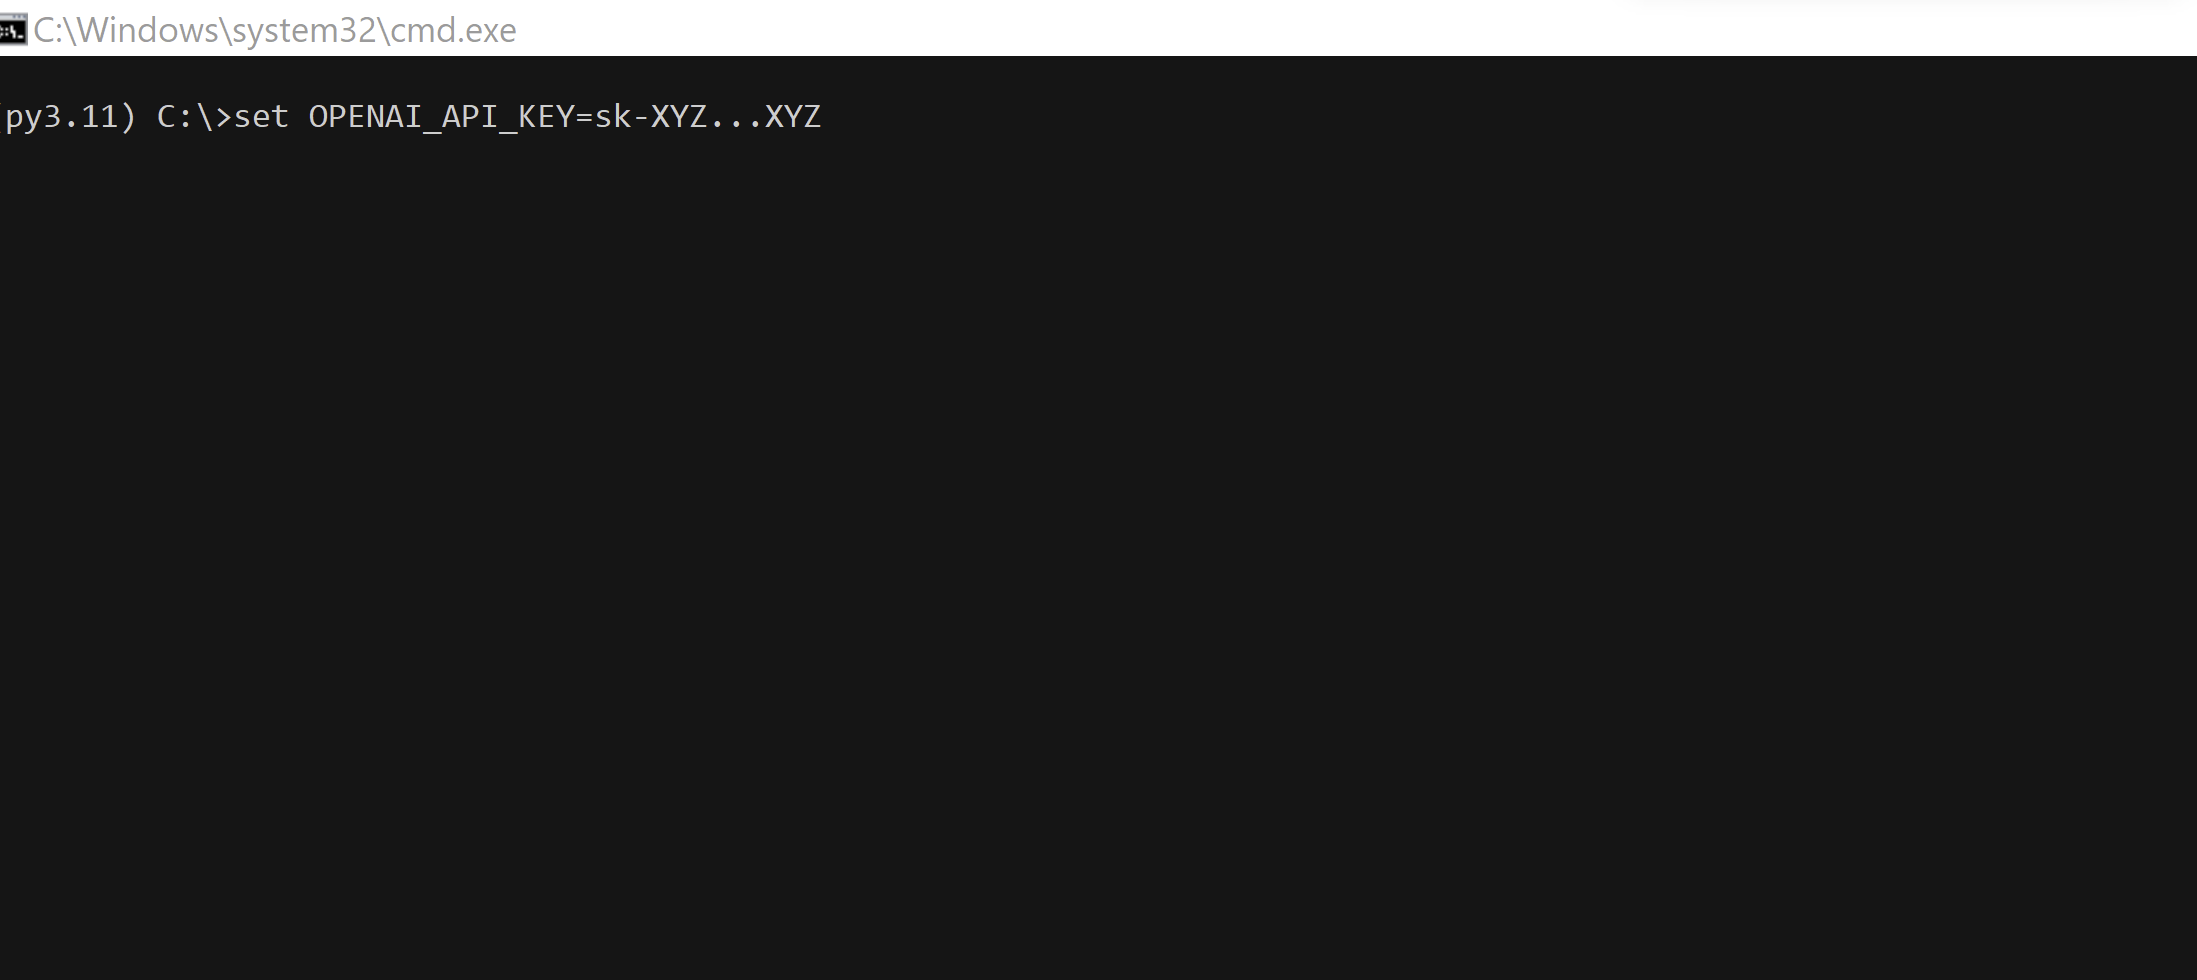
    
#### You will use it to make OpenAI API calls like this:
- openai.api_key = os.getenv("OPENAI_API_KEY")
    
</br>
    

<div class="alert alert-block alert-warning">

### Install OpenAI package
- pip install openai
    


!pip install openai
!pip install scipy
!pip install tenacity
!pip install tiktoken
!pip install termcolor 
!pip install openai
!pip install requests

In [1]:
import os
import openai

import json
import openai
import requests
from tenacity import retry, wait_random_exponential, stop_after_attempt
from termcolor import colored

GPT_MODEL = "gpt-3.5-turbo"

#openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_key = "hashed"

<div class="alert alert-info">
    
### Here is the URL for the OpenAPI docs:
- https://platform.openai.com/docs/api-reference/introduction
    
### Here is the list of OpenAPI models:   
- https://platform.openai.com/docs/models/overview

### We are using :
- gpt-3.5-turbo

In [2]:
# Helper Function

def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

<div class="alert alert-info">

### Different types of output formats:
1. List
2. Old-style table/text
3. HTML
4. JSON

In [20]:
text = f"""
what is the list of best \ 
electrical vehicles with mileage range and cost.
"""
prompt = f"""
Create a list \ 
```{text}```
"""

In [21]:
response = get_completion(prompt)
print(response)

Here is a list of some of the best electrical vehicles along with their mileage range and cost:

1. Tesla Model S: Mileage range - up to 402 miles, Cost - starting from $69,420
2. Chevrolet Bolt EV: Mileage range - up to 259 miles, Cost - starting from $36,500
3. Nissan Leaf: Mileage range - up to 226 miles, Cost - starting from $31,600
4. Audi e-tron: Mileage range - up to 222 miles, Cost - starting from $65,900
5. Hyundai Kona Electric: Mileage range - up to 258 miles, Cost - starting from $37,190
6. Jaguar I-PACE: Mileage range - up to 234 miles, Cost - starting from $69,850
7. Kia Niro EV: Mileage range - up to 239 miles, Cost - starting from $39,090
8. Ford Mustang Mach-E: Mileage range - up to 305 miles, Cost - starting from $42,895
9. BMW i3: Mileage range - up to 153 miles, Cost - starting from $44,450
10. Volkswagen ID.4: Mileage range - up to 250 miles, Cost - starting from $39,995

Please note that the mileage range and cost may vary depending on the specific model and trim 

In [22]:
text = f"""
what is the list of best \ 
electrical vehicles with mileage range and cost.
"""

In [23]:
prompt = f"""
Create a table \ 
```{text}```
"""

In [24]:
response = get_completion(prompt)
print(response)

| Electrical Vehicle | Mileage Range (in miles) | Cost (in USD) |
|--------------------|-------------------------|---------------|
| Tesla Model S      | 370                     | $69,420       |
| Chevrolet Bolt EV  | 259                     | $36,500       |
| Nissan Leaf        | 226                     | $31,600       |
| Hyundai Kona EV    | 258                     | $37,190       |
| Audi e-tron        | 222                     | $65,900       |
| Jaguar I-PACE      | 234                     | $69,850       |
| Kia Soul EV        | 243                     | $35,000       |
| BMW i3             | 153                     | $44,450       |
| Ford Mustang Mach-E| 300                     | $42,895       |
| Volkswagen ID.4    | 250                     | $39,995       |


In [25]:
from IPython.display import display, HTML

<div class="alert alert-info">
Create HTML Output


In [26]:
prompt = f"""
Create HTML table \ 
```{text}```
"""

In [27]:
response = get_completion(prompt)
display(HTML(response))

Vehicle,Mileage Range,Cost
Tesla Model S,402 miles,"$69,420"
Tesla Model 3,353 miles,"$37,990"
Tesla Model X,371 miles,"$79,990"
Tesla Model Y,326 miles,"$39,990"
Chevrolet Bolt EV,259 miles,"$36,500"
Nissan Leaf,226 miles,"$31,670"


<div class="alert alert-info">
Create JSON Output


In [28]:
prompt = f"""
Create JSON  \ 
```{text}```
"""

In [29]:
response = get_completion(prompt)
print(response)

{
  "query": "what is the list of best electrical vehicles with mileage range and cost",
  "category": "automobile",
  "sub-category": "electric vehicles",
  "attributes": [
    {
      "name": "vehicle",
      "type": "string",
      "description": "Name of the electric vehicle"
    },
    {
      "name": "mileage_range",
      "type": "string",
      "description": "Range of the vehicle in miles per charge"
    },
    {
      "name": "cost",
      "type": "string",
      "description": "Cost of the electric vehicle"
    }
  ]
}


<div class="alert alert-info">

**Prompt Mini Template:**
1. Do not assume ...
2. Task ...
3. Output Format ...


In [30]:
prompt = f"""

Do not assume, use only JSON format

Your task :  
    what is the list of best electrical vehicles with mileage range and cost.


Use the following format:
    Output JSON: summary and Manufacturer, Model, mileage_range, cost


"""

response = get_completion(prompt)

print(response)

{
  "summary": "List of best electrical vehicles with mileage range and cost",
  "vehicles": [
    {
      "Manufacturer": "Tesla",
      "Model": "Model S",
      "mileage_range": "390 miles",
      "cost": "$69,420"
    },
    {
      "Manufacturer": "Chevrolet",
      "Model": "Bolt EV",
      "mileage_range": "259 miles",
      "cost": "$36,500"
    },
    {
      "Manufacturer": "Nissan",
      "Model": "Leaf",
      "mileage_range": "226 miles",
      "cost": "$31,600"
    },
    {
      "Manufacturer": "Hyundai",
      "Model": "Kona Electric",
      "mileage_range": "258 miles",
      "cost": "$37,190"
    },
    {
      "Manufacturer": "Kia",
      "Model": "Niro EV",
      "mileage_range": "239 miles",
      "cost": "$39,090"
    }
  ]
}


<div class="alert alert-block alert-danger">
    
### Be aware of the current call limit of OpenAI:
<br>
    
- RateLimitError: Rate limit reached for default-gpt-3.5-turbo in organization org-XYZ123... on requests per min. 
    - Limit: 3 / min. Please try again in 20s.
            

<div class="alert alert-block alert-warning">
    
## Prompt Engineering
- **Effective Prompt** will have the following clearly stated in the prompt body:
    1. Role
    2. Context
    3. Task
    4. Output Format

<div class="alert alert-info">
    
## Add a CONTEXT to your  question

In [31]:
prompt = """
Context: I want to buy an electric vehicle. 
Task: Give me a suggestion for list of vehicles to consider."""

In [32]:
response = get_completion(prompt)

print(response)

Here is a list of electric vehicles that you may consider:

1. Tesla Model 3: Known for its impressive range, performance, and advanced technology features, the Model 3 is a popular choice among electric vehicle enthusiasts.

2. Nissan Leaf: A reliable and affordable option, the Nissan Leaf offers a comfortable ride, decent range, and a well-designed interior.

3. Chevrolet Bolt EV: With a longer range compared to many other electric vehicles in its price range, the Bolt EV is a practical choice for daily commuting and longer trips.

4. Hyundai Kona Electric: Offering a spacious interior, good range, and a smooth ride, the Kona Electric is a versatile option for those looking for a compact SUV.

5. Audi e-tron: If you prefer a luxury electric SUV, the Audi e-tron combines a stylish design, high-quality interior, and impressive performance.

6. BMW i3: With its unique design and agile handling, the BMW i3 is a great option for urban driving. It also offers an optional range extender for

<div class="alert alert-info">
    
##  Instruct the model to ask questions about the context of the task being asked to do

In [33]:
prompt = """
Context: I want to buy an electric vehicle. 
Task: Give me a suggestion for list of vehciles to consider.
Do not perform the requested task! Instead, can you ask me questions about the context so that when I answer, you can perform the requested task more efficiently?
"""

In [34]:
response = get_completion(prompt)

print(response)

Sure! Here are a few questions to help me understand your preferences and requirements for an electric vehicle:

1. What is your budget for purchasing an electric vehicle?
2. How far do you typically drive in a day or week?
3. Do you have access to charging stations at home or work?
4. Are you looking for a specific type of vehicle, such as a sedan, SUV, or hatchback?
5. Do you have any specific features or requirements in mind, such as range, acceleration, or advanced safety features?
6. Are there any particular brands or models that you are already interested in?
7. Are you open to considering both new and used electric vehicles?
8. Do you have any preferences regarding the size or seating capacity of the vehicle?
9. Are there any specific incentives or rebates available in your area for purchasing an electric vehicle?
10. Are there any other factors or considerations that are important to you when choosing an electric vehicle?

Once you provide your answers, I'll be able to suggest 

<div class="alert alert-info">
    
##  Add details to the TASK, and then ask the model 

In [35]:
prompt = """
Context: I want to buy an electric vehicle. 
Task: Give me a suggestion for list of vehciles to consider. I drive to work more than 250 miles every day, and I have a budget of $40,000 for the vehicle to buy. of 

"""

In [36]:
response = get_completion(prompt)

print(response)

Considering your daily commute of more than 250 miles and a budget of $40,000, here are some electric vehicles that you should consider:

1. Tesla Model 3: With a range of up to 353 miles (Long Range version), the Model 3 is a popular choice for long-distance driving. It starts at around $39,000, making it a great option within your budget.

2. Chevrolet Bolt EV: This compact electric vehicle offers a range of up to 259 miles. Priced at around $36,500, it provides good value for money and is suitable for your daily commute.

3. Hyundai Kona Electric: With a range of up to 258 miles, the Kona Electric is a practical choice. It starts at around $37,000 and offers a spacious interior, making it suitable for longer drives.

4. Nissan Leaf Plus: The Leaf Plus variant provides a range of up to 226 miles. Starting at around $38,000, it offers a comfortable ride and is a reliable option for your daily commute.

5. Ford Mustang Mach-E: This all-electric SUV has a range of up to 305 miles (Exten

<div class="alert alert-info">
    
## OpenAI Examples can be found here:
- https://platform.openai.com/examples
<br>
<br>

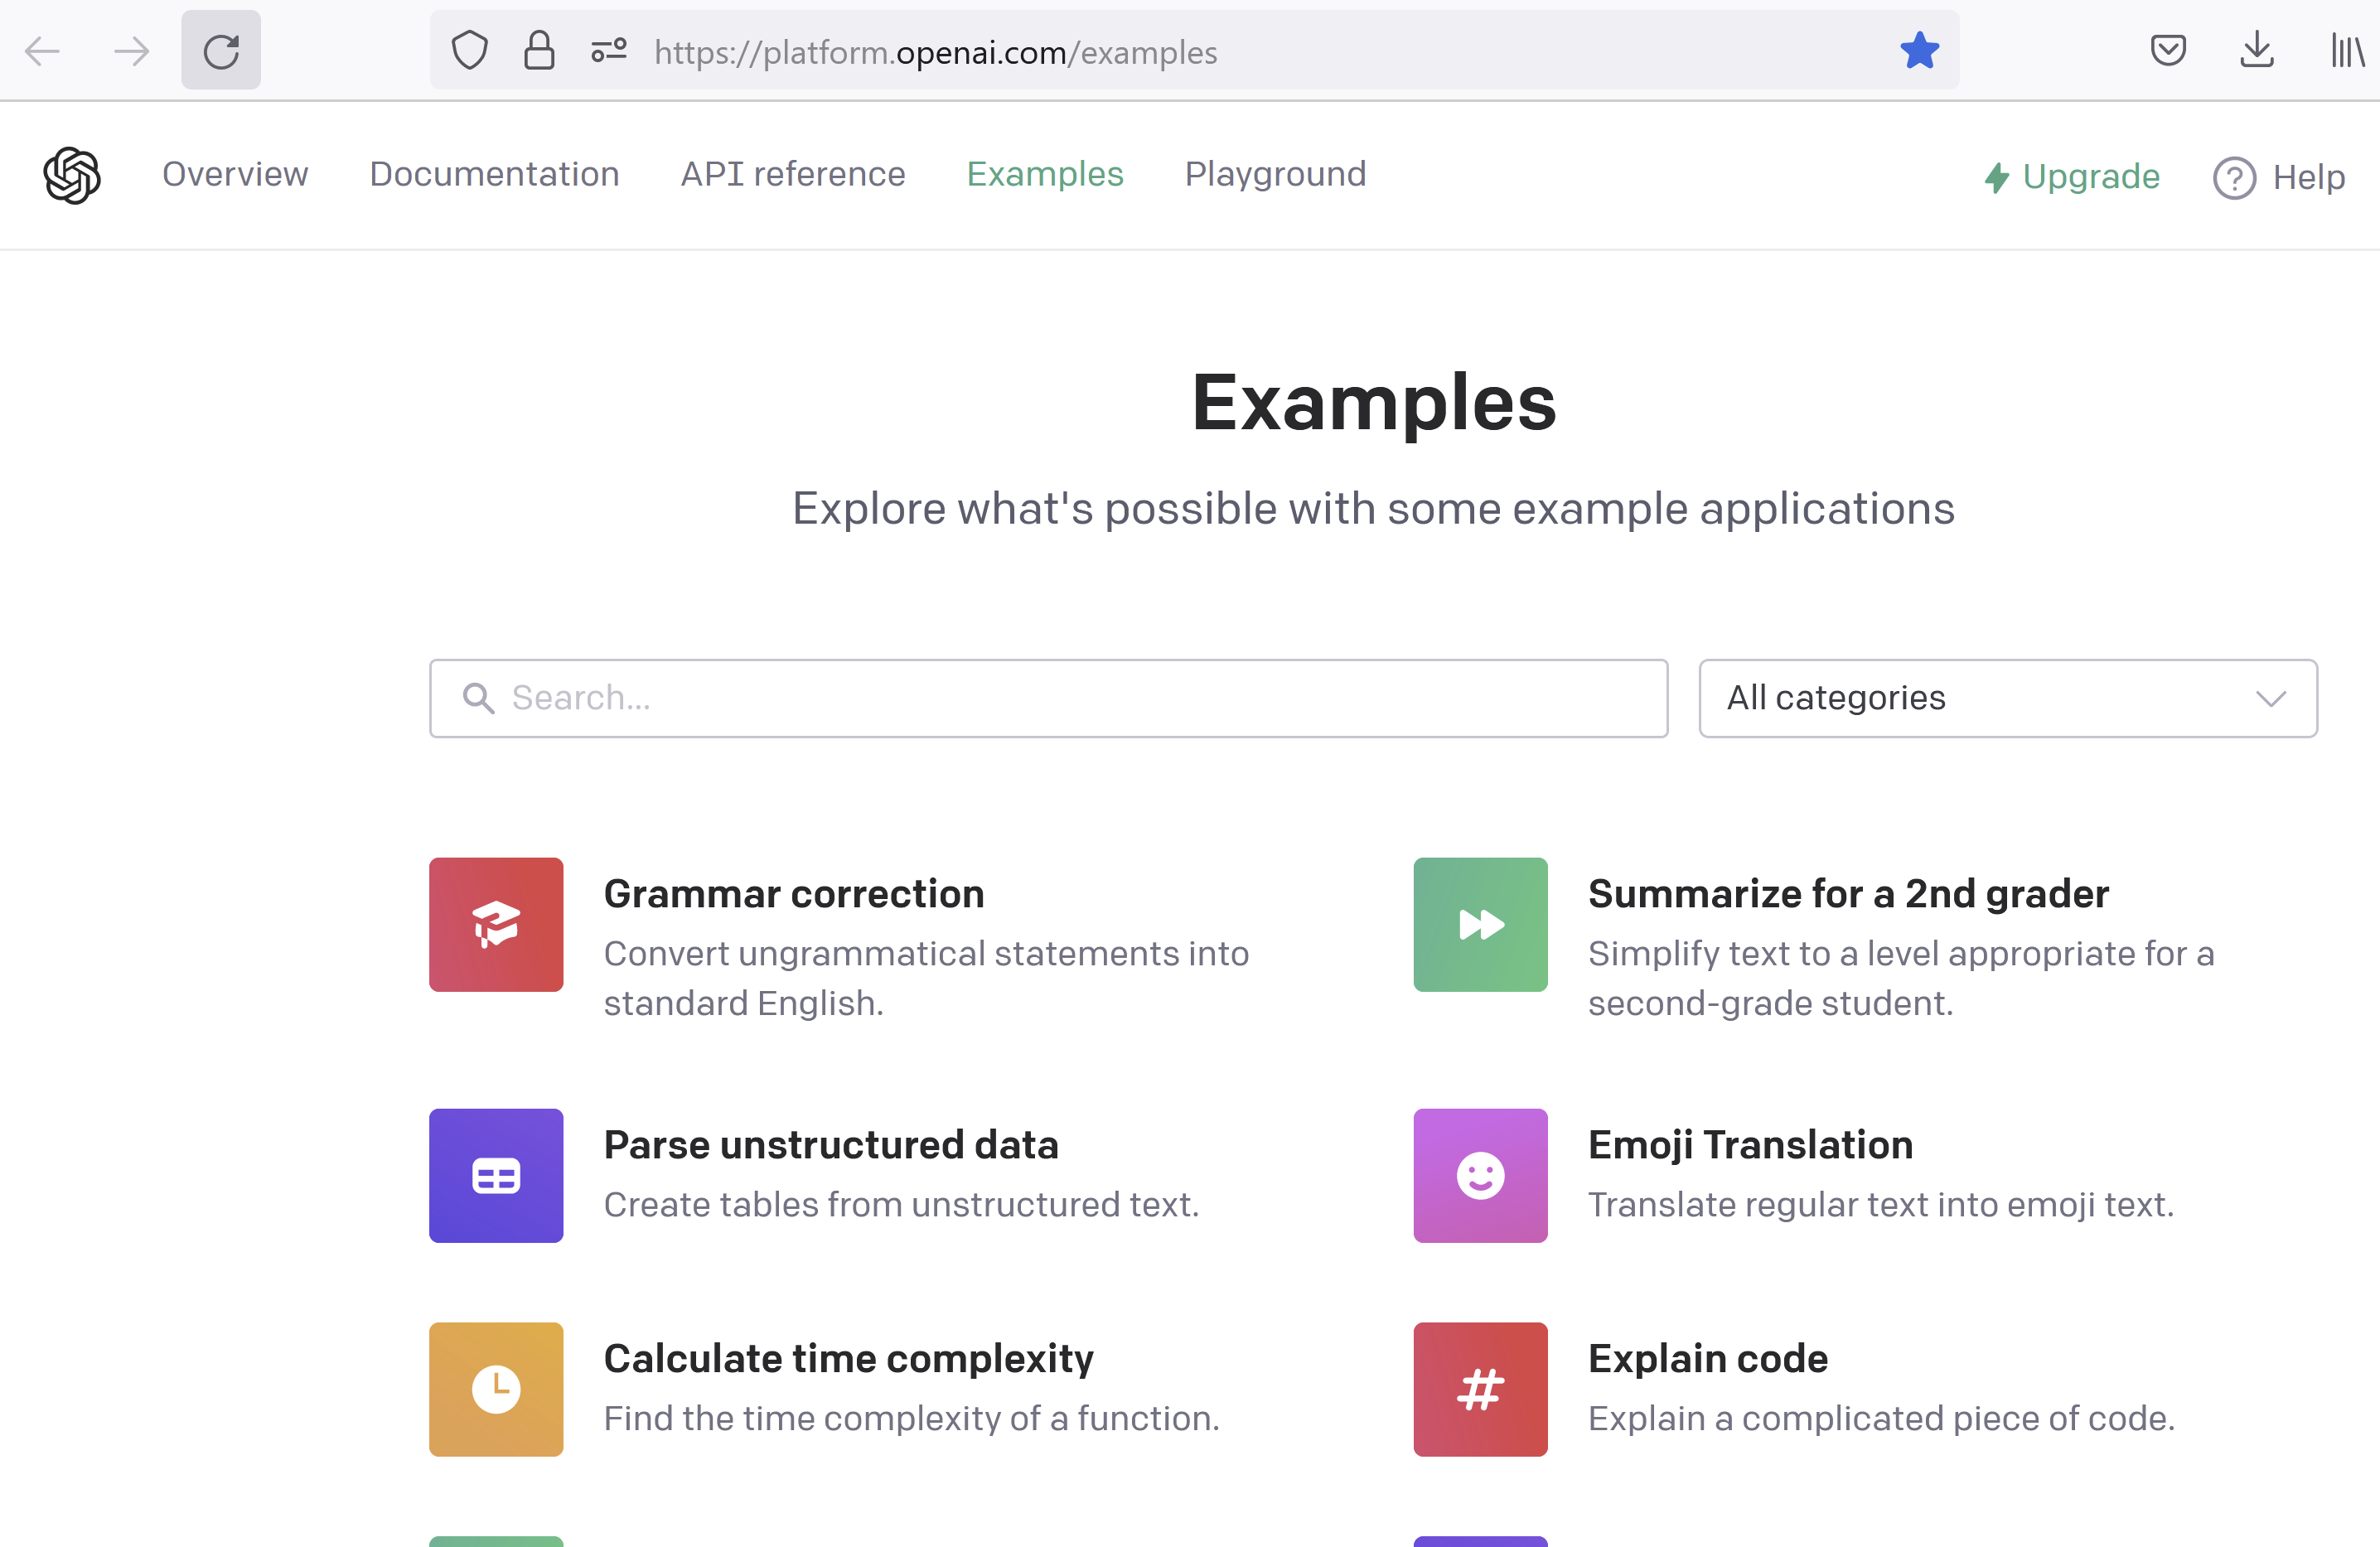

<div class="alert alert-info">
    
# Examples

<div class="alert alert-info">
    
### Grammar correction
- Corrects sentences to standard English.

In [37]:
response = get_completion("Correct this to standard English: She no went to the market.")

print(response)

She did not go to the market.


<div class="alert alert-info">
    
## Python to natural language

- Explain a piece of Python code in a language people can understand.

In [3]:
response = get_completion("""
# Python 3 
def hello(x): 
print('hello '+str(x)) 
# Explanation of what the code does""")

print(response)

The code defines a function called "hello" that takes a parameter "x". Inside the function, it prints the string "hello " concatenated with the string representation of the parameter "x".


<div class="alert alert-info">
    
## SQL request

- Simple SQL query building.

In [4]:
response = get_completion("Create a SQL request to find all users who live in California and have over 1000 credits")

print(response)

SELECT * 
FROM users 
WHERE state = 'California' AND credits > 1000;


<div class="alert alert-info">
    
## The Role is used to influence the model to provide us with a desired response by forcing it to respond in a role-defining way.

In [5]:
prompt = """
Role: You are a salesperson for electric vehicles.
Context: I want to buy an electric vehicle. 
Task: Give me a suggestion for list of vehciles to consider. I drive to work more than 250 miles every day, and I have a budget of $40,000 for the vehicle to buy. of 

"""

In [6]:
response = get_completion(prompt)

print(response)

As a salesperson for electric vehicles, I would recommend considering the following options based on your requirements of driving more than 250 miles every day and having a budget of $40,000:

1. Tesla Model 3: The Model 3 offers an impressive range of up to 353 miles on a single charge, making it suitable for your daily commute. It falls within your budget and provides a luxurious driving experience with advanced features.

2. Chevrolet Bolt EV: With a range of up to 259 miles, the Bolt EV is a practical choice for your long daily drives. It offers ample interior space and a comfortable ride. Additionally, it is relatively more affordable compared to some other electric vehicles.

3. Hyundai Kona Electric: The Kona Electric provides a range of up to 258 miles, making it a suitable option for your daily commute. It offers a stylish design, spacious interior, and a smooth driving experience. It also falls within your budget range.

4. Nissan Leaf Plus: The Leaf Plus variant offers an ex

<div class="alert alert-info">
    
## Transformers in large language models (LLM) vs.  arithmetic logic unit (ALU) and floating-point unit (FPU)

- The LLM model does not have ALU/FPU to perform mathematical calculations; numbers are considered like words; there is no mathematical unit in the transformer architecture. 


In [7]:
prompt = "How much is 2+2?"

response = get_completion(prompt)

print(response)

2 + 2 equals 4.


In [8]:
prompt = "How much is 4*5?"

response = get_completion(prompt)

print(response)

4 multiplied by 5 equals 20.


<div class="alert alert-info">
    
### The following answer from ChatGPT for the calculation of  (123 * 456789)  is WRONG
- the correct answer is 56,185,047

In [9]:
prompt = "How much is 123 * 456789?"

response = get_completion(prompt)

print(response)

The product of 123 multiplied by 456789 is 56,152,347.


<div class="alert alert-info">
    
## Zero-shot-CoT strategy
- It turns out that by adding "Let's think step by step" to the prompt, the model has empirically proven itself capable of solving more complicated reasoning problems. This technique also called the Zero-shot-CoT strategy, was first introduced in a scientific paper called Large Language Models are Zero-Shot Reasoners by Takeshi Kojima et al., published in 2022. 
- with this sentence added to the prompt, the model begins to reason by breaking the problem into sub-problems. As a result, it can take time to reason, allowing it to find solutions to problems it could not solve before in only one shot.
- visit this URL for COT prompt runs: https://learnprompting.org/docs/intermediate/chain_of_thought


In [10]:
prompt = "How much is 123 * 456789? Let's think step by step."

response = get_completion(prompt)

print(response)

To calculate 123 multiplied by 456789 step by step, we can use the long multiplication method:

           123
    × 456789
    __________

First, we multiply 123 by 9 (the rightmost digit of 456789):

           123
    ×  9
    _______
           9 (3 x 9)
         1 2  (2 x 9)
       1 1 0 (1 x 9)
    _______

Next, we multiply 123 by 8 (the next digit of 456789):

           123
    ×  8
    _______
         9 8 4 (4 x 123)
       9 8 4   (8 x 123, shifted one place to the left)
    _______

Then, we multiply 123 by 7 (the next digit of 456789):

           123
    ×  7
    _______
       8 6 1   (3 x 123)
     6 1 2     (7 x 123, shifted two places to the left)
    _______

Continuing this process, we multiply 123 by 6, 5, 4, and 2 (the remaining digits of 456789):

           123
    ×  6
    _______
     7 3 8  (3 x 123)
   4 9 2    (6 x 123, shifted three places to the left)
    _______

           123
    ×  5
    _______
   6 1 5    (3 x 123)
 3 0 7      (5 x 123, shifted fou

<div class="alert alert-info">
    
## Do you think this answer is correct?
### Compare the following 3 answers you got:
- Your calculator's 
- Raw prompt
- "Let's think step by step" prompt

The right answer is 56,185,047

<div class="alert alert-block alert-danger">
    
Even though the model took much longer to provide a break-down of the answer when using the "Let's think step by step" prompt, and gave the impression that it is breaking the problem into sub-problems to demonstrate how it did the logical reasoning and the the mathematical calculations it performed to get this result, however, it still produced the **WRONG answer**.

<div class="alert alert-info">
    
## Inferring  sentiments about products/services based on their reviews

In [11]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

In [12]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp",
  "Brand": "Lumina"
}


</br>
</br>


<div class="alert alert-block alert-danger">
    
## Now you have learned the basics of OpenAI Chat Completion, lets use it to connect and query a relational database application.
- We will use https://api.openai.com/v1/chat/completions to send a POST request of JSON input
- We will use functions and function_call in the CONVERSATION with the database
- Utility functions are original provided by OpenAPI Cookbook examples

    
</br>
</br>
    

<div class="alert alert-block alert-warning">
    
## Build SaleCo Database on Postgres
- Install **Postgres 14** on your computer
- set PATH=%PATH%;C:\Program Files\PostgreSQL\14\bin;.
- psql -p 5433 -U postgres -f Build-DB-SaleCo.sql
- Use **psql** to run the following SQL script to build database schema and insert the rows in the tables:
    1. Build-DB-SaleCo
    2. LoadRowsIntoDB
   
</br>
</br>

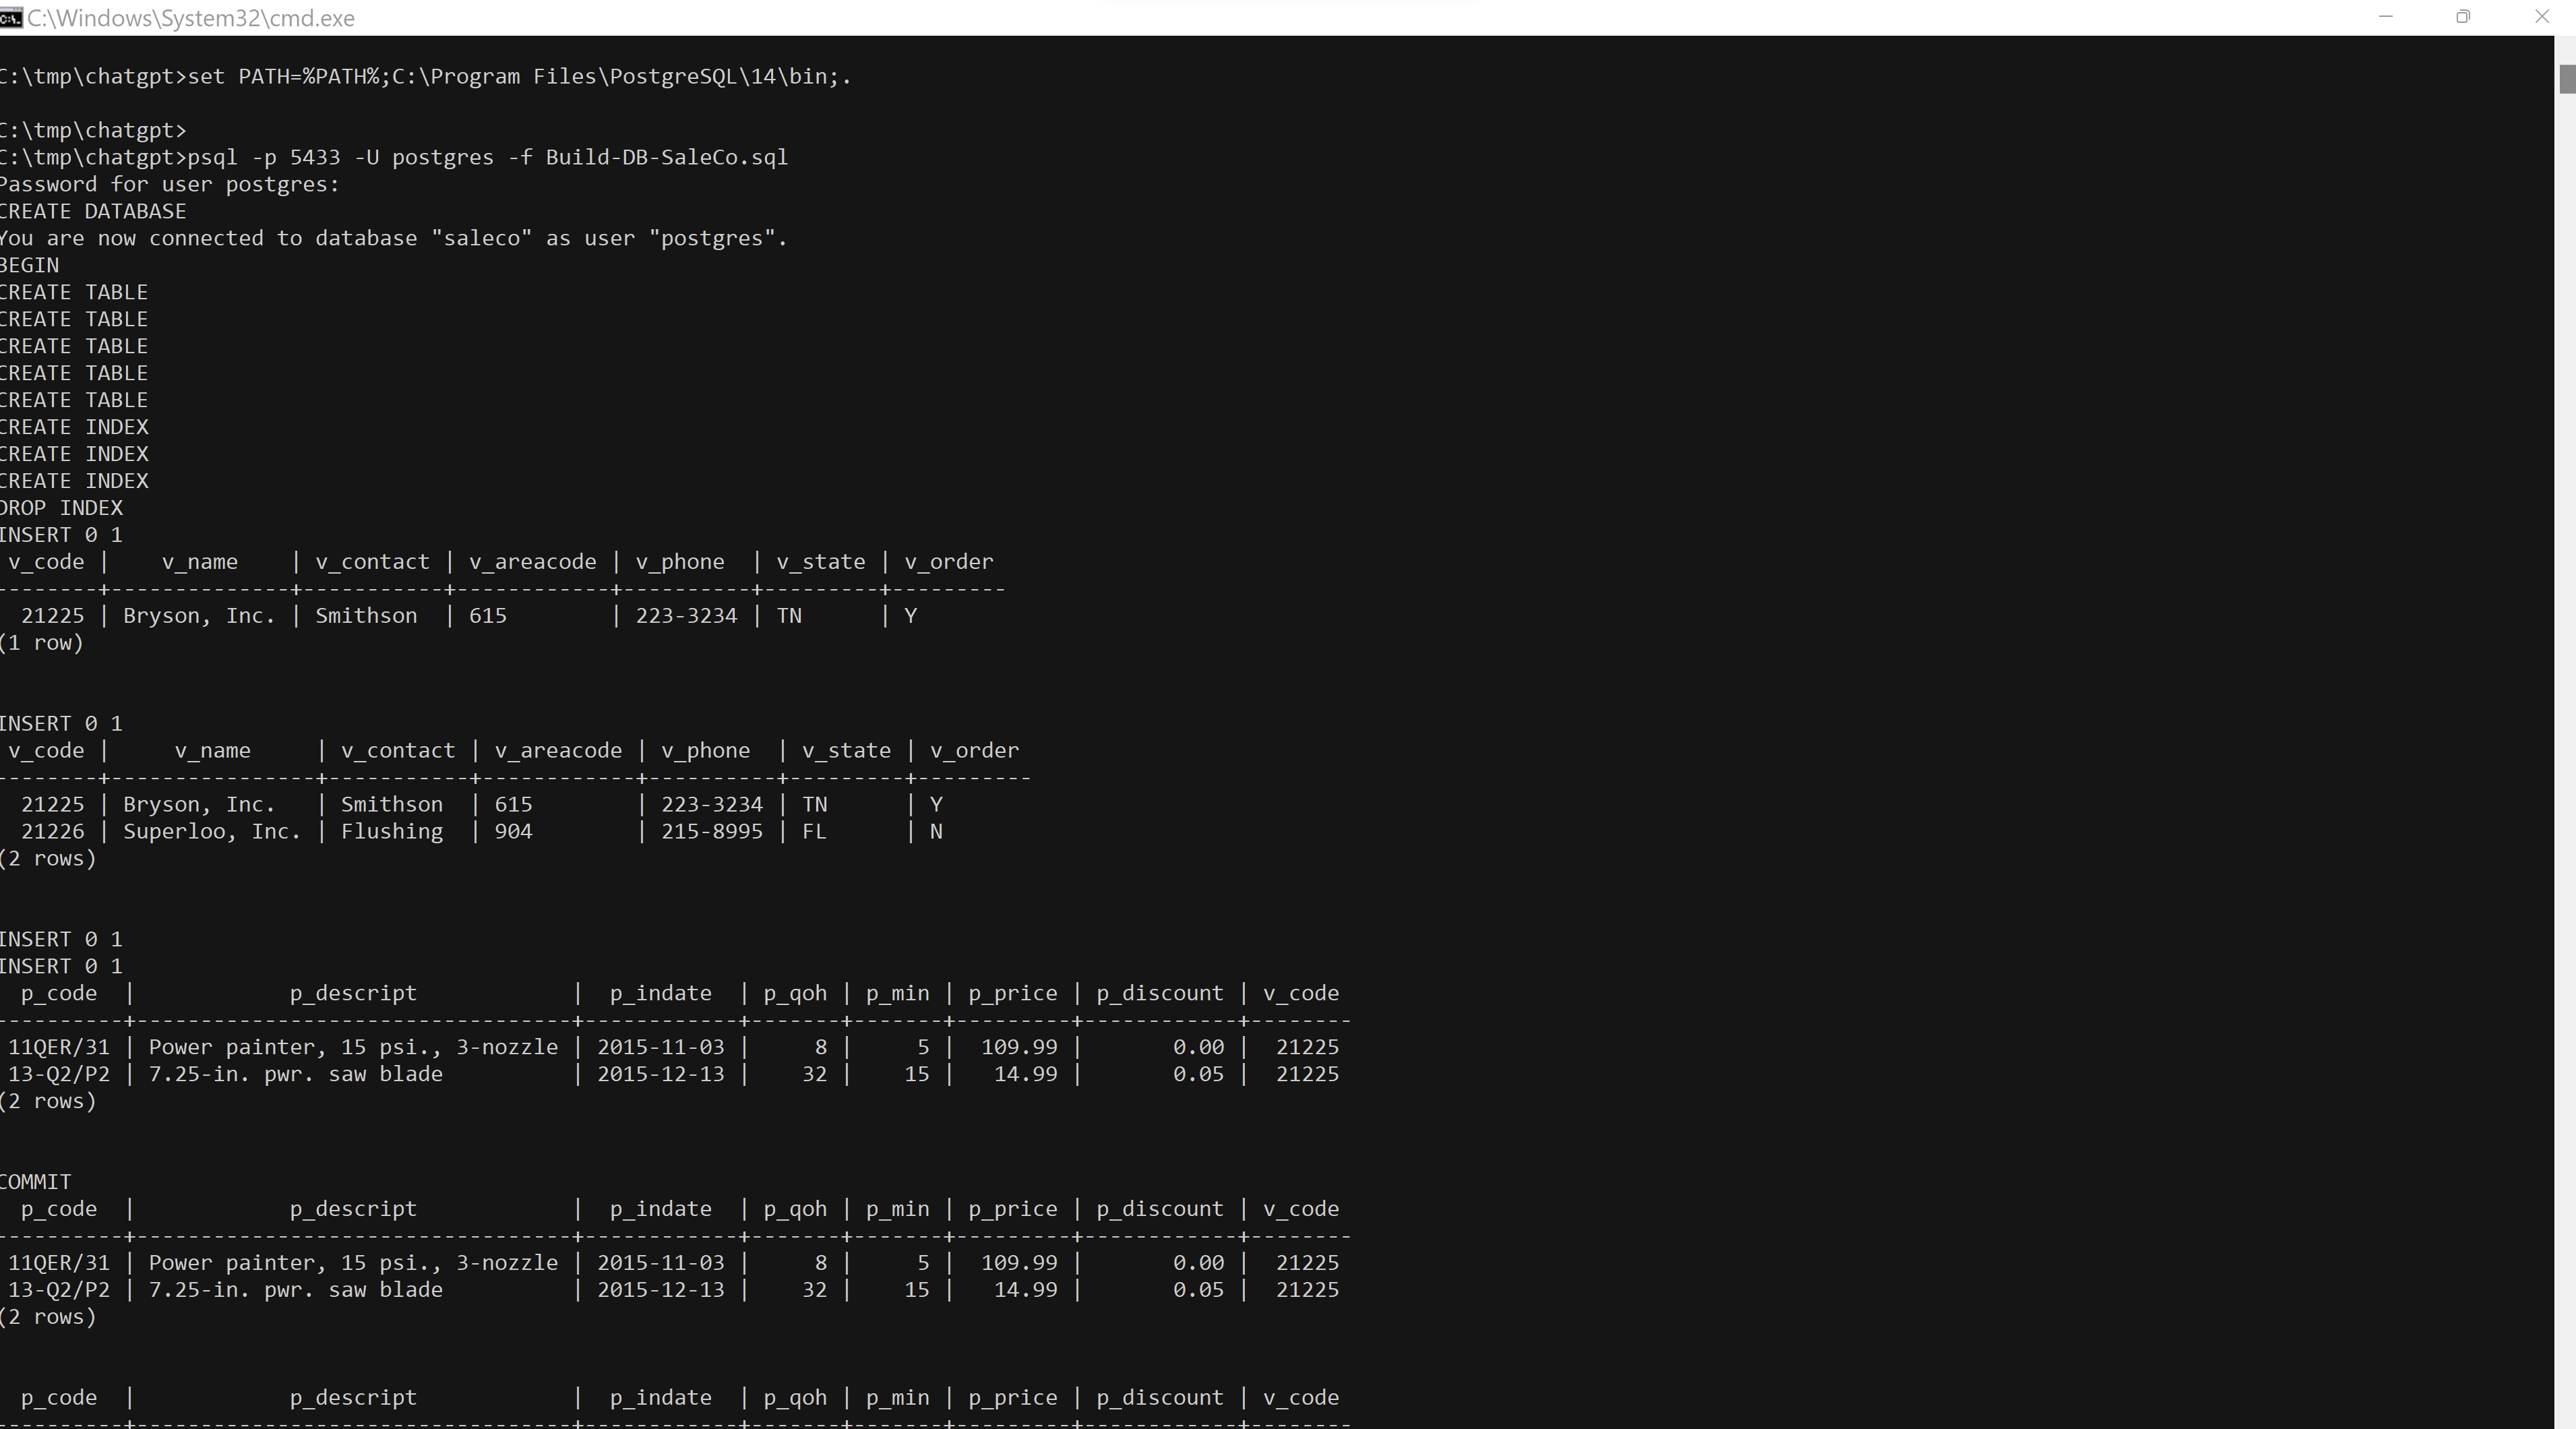


### Utilities

First let's define a few utilities for making calls to the Chat Completions API and for maintaining and keeping track of the conversation state.

In [13]:
@retry(wait=wait_random_exponential(multiplier=1, max=40), stop=stop_after_attempt(3))
def chat_completion_request(messages, functions=None, function_call=None, model=GPT_MODEL):
    headers = {
        "Content-Type": "application/json",
        "Authorization": "Bearer " + openai.api_key,
    }
    json_data = {"model": model, "messages": messages}
    if functions is not None:
        json_data.update({"functions": functions})
    if function_call is not None:
        json_data.update({"function_call": function_call})
    try:
        response = requests.post(
            "https://api.openai.com/v1/chat/completions",
            headers=headers,
            json=json_data,
        )
        return response
    except Exception as e:
        print("Unable to generate ChatCompletion response")
        print(f"Exception: {e}")
        return e

In [14]:
def pretty_print_conversation(messages):
    role_to_color = {
        "system": "red",
        "user": "green",
        "assistant": "blue",
        "function": "magenta",
    }
    
    for message in messages:
        if message["role"] == "system":
            print(colored(f"system: {message['content']}\n", role_to_color[message["role"]]))
        elif message["role"] == "user":
            print(colored(f"user: {message['content']}\n", role_to_color[message["role"]]))
        elif message["role"] == "assistant" and message.get("function_call"):
            print(colored(f"assistant: {message['function_call']}\n", role_to_color[message["role"]]))
        elif message["role"] == "assistant" and not message.get("function_call"):
            print(colored(f"assistant: {message['content']}\n", role_to_color[message["role"]]))
        elif message["role"] == "function":
            print(colored(f"function ({message['name']}): {message['content']}\n", role_to_color[message["role"]]))

In [16]:
import psycopg2

#establishing the connection
conn = psycopg2.connect(
   database="saleco", user='postgres', password='root', host='127.0.0.1', port= '5432'
)

In [17]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Executing a select statement using the execute() method
cursor.execute("select version()")


In [18]:
# Fetch a single row using fetchone() method.
data = cursor.fetchone()
print("Connection established to: ",data)

Connection established to:  ('PostgreSQL 15.4, compiled by Visual C++ build 1914, 64-bit',)


In [19]:
def get_table_names(conn):
    """Return a list of table names."""
    table_names = []
    cursor = conn.cursor()
    cursor.execute("SELECT table_name FROM information_schema.tables WHERE table_schema='public' AND table_type='BASE TABLE';")
    for table in cursor.fetchall():
        table_names.append(table[0])
    return table_names


def get_column_names(conn, table_name):
    """Return a list of column names."""
    column_names = []
    cursor = conn.cursor()
    cursor.execute("SELECT column_name FROM information_schema.columns WHERE table_schema = 'public' AND table_name   = %s;", [table_name])
    for col in cursor.fetchall():
        column_names.append(col[0])
    return column_names


def get_database_info(conn):
    """Return a list of dicts containing the table name and columns for each table in the database."""
    table_dicts = []
    for table_name in get_table_names(conn):
        columns_names = get_column_names(conn, table_name)
        table_dicts.append({"table_name": table_name, "column_names": columns_names})
    return table_dicts


In [20]:
table_names = get_table_names(conn)
print(len(table_names), table_names)

7 ['vendor', 'product', 'customer', 'invoice', 'line', 'v', 'p']


In [21]:
column_names_customer_table = get_column_names(conn, 'customer')
print(len(column_names_customer_table), column_names_customer_table)

7 ['cus_code', 'cus_lname', 'cus_fname', 'cus_initial', 'cus_areacode', 'cus_phone', 'cus_balance']


In [22]:
get_database_info(conn)

[{'table_name': 'vendor',
  'column_names': ['v_code',
   'v_name',
   'v_contact',
   'v_areacode',
   'v_phone',
   'v_state',
   'v_order']},
 {'table_name': 'product',
  'column_names': ['p_code',
   'p_descript',
   'p_indate',
   'p_qoh',
   'p_min',
   'p_price',
   'p_discount',
   'v_code']},
 {'table_name': 'customer',
  'column_names': ['cus_code',
   'cus_lname',
   'cus_fname',
   'cus_initial',
   'cus_areacode',
   'cus_phone',
   'cus_balance']},
 {'table_name': 'invoice',
  'column_names': ['inv_number', 'cus_code', 'inv_date']},
 {'table_name': 'line',
  'column_names': ['inv_number',
   'line_number',
   'p_code',
   'line_units',
   'line_price']},
 {'table_name': 'v',
  'column_names': ['v_code',
   'v_name',
   'v_contact',
   'v_areacode',
   'v_phone',
   'v_state',
   'v_order']},
 {'table_name': 'p',
  'column_names': ['p_code',
   'p_descript',
   'p_indate',
   'p_qoh',
   'p_min',
   'p_price',
   'p_discount',
   'v_code']}]

In [23]:
database_schema_dict = get_database_info(conn)
database_schema_string = "\n".join(
    [
        f"Table: {table['table_name']}\nColumns: {', '.join(table['column_names'])}"
        for table in database_schema_dict
    ]
)

print(database_schema_string)

Table: vendor
Columns: v_code, v_name, v_contact, v_areacode, v_phone, v_state, v_order
Table: product
Columns: p_code, p_descript, p_indate, p_qoh, p_min, p_price, p_discount, v_code
Table: customer
Columns: cus_code, cus_lname, cus_fname, cus_initial, cus_areacode, cus_phone, cus_balance
Table: invoice
Columns: inv_number, cus_code, inv_date
Table: line
Columns: inv_number, line_number, p_code, line_units, line_price
Table: v
Columns: v_code, v_name, v_contact, v_areacode, v_phone, v_state, v_order
Table: p
Columns: p_code, p_descript, p_indate, p_qoh, p_min, p_price, p_discount, v_code


In [24]:
functions = [
    {
        "name": "ask_database",
        "description": "Use this function to answer user questions about saleco. Output should be a fully formed SQL query.",
        "parameters": {
            "type": "object",
            "properties": {
                "query": {
                    "type": "string",
                    "description": f"""
                            SQL query extracting info to answer the user's question.
                            SQL should be written using this database schema:
                            {database_schema_string}
                            The query should be returned in plain text, not in JSON.
                            """,
                }
            },
            "required": ["query"],
        },
    }
]

In [25]:
def ask_database(conn, query):
    """Function to query Postgres database with a provided SQL query."""
    try:
        cursor = conn.cursor()
        cursor.execute(query)
        results = str(cursor.fetchall())
    except Exception as e:
        results = f"query failed with error: {e}"
    return results

def execute_function_call(message):
    if message["function_call"]["name"] == "ask_database":
        query = json.loads(message["function_call"]["arguments"])["query"]
        results = ask_database(conn, query)
    else:
        results = f"Error: function {message['function_call']['name']} does not exist"
    return results

In [26]:
messages = []
messages.append({"role": "system", "content": "Answer user questions by generating SQL queries against the Saleco Database."})
messages.append({"role": "user", "content": "Hi, who are the top 3 customer by number of invoices?"})
chat_response = chat_completion_request(messages, functions)
assistant_message = chat_response.json()["choices"][0]["message"]
messages.append(assistant_message)
if assistant_message.get("function_call"):
    results = execute_function_call(assistant_message)
    messages.append({"role": "function", "name": assistant_message["function_call"]["name"], "content": results})
pretty_print_conversation(messages)

system: Answer user questions by generating SQL queries against the Saleco Database.

user: Hi, who are the top 3 customer by number of invoices?

assistant: {'name': 'ask_database', 'arguments': '{\n  "query": "SELECT cus_code, COUNT(*) as num_invoices FROM invoice GROUP BY cus_code ORDER BY num_invoices DESC LIMIT 3;"\n}'}

function (ask_database): [(10011, 3), (10014, 2), (10015, 1)]



In [27]:
messages.append({"role": "user", "content": "What is the name of the vendor with the most products?"})
chat_response = chat_completion_request(messages, functions)
assistant_message = chat_response.json()["choices"][0]["message"]
messages.append(assistant_message)
if assistant_message.get("function_call"):
    results = execute_function_call(assistant_message)
    messages.append({"role": "function", "content": results, "name": assistant_message["function_call"]["name"]})
pretty_print_conversation(messages)

system: Answer user questions by generating SQL queries against the Saleco Database.

user: Hi, who are the top 3 customer by number of invoices?

assistant: {'name': 'ask_database', 'arguments': '{\n  "query": "SELECT cus_code, COUNT(*) as num_invoices FROM invoice GROUP BY cus_code ORDER BY num_invoices DESC LIMIT 3;"\n}'}

function (ask_database): [(10011, 3), (10014, 2), (10015, 1)]

user: What is the name of the vendor with the most products?

assistant: {'name': 'ask_database', 'arguments': '{\n  "query": "SELECT v_name, COUNT(p_code) as num_products FROM vendor JOIN product ON vendor.v_code = product.v_code GROUP BY v_name ORDER BY num_products DESC LIMIT 1;"\n}'}

function (ask_database): [('Bryson, Inc.', 4)]



In [32]:
messages.append({"role": "user", "content": "List the product names of the vendor with the most products?"})
chat_response = chat_completion_request(messages, functions)
assistant_message = chat_response.json()["choices"][0]["message"]
messages.append(assistant_message)
if assistant_message.get("function_call"):
    results = execute_function_call(assistant_message)
    messages.append({"role": "function", "content": results, "name": assistant_message["function_call"]["name"]})
pretty_print_conversation(messages)

system: Answer user questions by generating SQL queries against the Saleco Database.

user: Hi, what are the top 3 most popular product names and who are their vendors?

assistant: {'name': 'ask_database', 'arguments': '{\n  "query": "SELECT p.p_descript AS product_name, v.v_name AS vendor_name FROM product p JOIN vendor v ON p.v_code = v.v_code ORDER BY p.p_qoh DESC LIMIT 3"\n}'}

function (ask_database): [('2.5-in. wd. screw, 50', 'D&E Supply'), ('1.25-in. metal screw, 25', 'Bryson, Inc.'), ('Rat-tail file, 1/8-in. fine', 'Gomez Bros.')]

user: List the product names of the vendor with the most products?

assistant: {'name': 'ask_database', 'arguments': '{\n  "query": "SELECT p.p_descript AS product_name FROM product p JOIN vendor v ON p.v_code = v.v_code GROUP BY v.v_name ORDER BY COUNT(p.p_code) DESC LIMIT 1"\n}'}

function (ask_database): query failed with error: column "p.p_descript" must appear in the GROUP BY clause or be used in an aggregate function
LINE 1: SELECT p.p_descrip

<div class="alert alert-block alert-danger">

**Requirement 1:** Prompt Engineering

</br>
    
Your task is to engineer 3 prompts for a business entrepreneur who intends to start an online business that sells Robot Vacuum Cleaners that will provide answers for the following specifications:
- Summary of suggestions for this business startup
- What are the most important features of the Robot Vacuum Cleaner that will attract customers and yield best customer satisfaction?
- What are the key process indicators (KPI) that should be considered for the O2C process of this business?

In [30]:
# Write your code here
prompt = """
I would like some suggestions on a startup business. This business would sell Robot Vacuum Cleaners. 
Please provide a summary of suggestions for this business.

I had a few questions that need to be answered for me to consider this business:
- What are the most important features of the Robot Vacuum Cleaner that will attract customers and yield best customer satisfaction?
- What are the key process indicators (KPI) that should be considered for the O2C process of this business?
"""

In [31]:
response = get_completion(prompt)

print(response)

Summary of suggestions for a startup business selling Robot Vacuum Cleaners:

1. Product Differentiation: To attract customers and ensure customer satisfaction, focus on offering unique features that set your Robot Vacuum Cleaners apart from competitors. Some important features to consider include:
   - Advanced navigation and mapping capabilities for efficient cleaning.
   - Customizable cleaning schedules and modes to suit different user preferences.
   - Strong suction power and effective cleaning performance on various surfaces.
   - Smart connectivity options, such as app control and compatibility with voice assistants.
   - Long battery life and automatic recharging capabilities.
   - Easy maintenance and user-friendly design.

2. Marketing and Branding: Develop a strong brand identity and marketing strategy to create awareness and generate interest in your Robot Vacuum Cleaners. Consider the following:
   - Highlight the unique features and benefits of your products through enga

<div class="alert alert-block alert-danger">

**Requirement 2:** List the top 3 most popular product names and their vendors for SaleCo Database?

In [28]:
messages = []
messages.append({"role": "system", "content": "Answer user questions by generating SQL queries against the Saleco Database."})
messages.append({"role": "user", "content": "Hi, what are the top 3 most popular product names and who are their vendors?"})
chat_response = chat_completion_request(messages, functions)
assistant_message = chat_response.json()["choices"][0]["message"]
messages.append(assistant_message)
if assistant_message.get("function_call"):
    results = execute_function_call(assistant_message)
    messages.append({"role": "function", "name": assistant_message["function_call"]["name"], "content": results})
pretty_print_conversation(messages)

system: Answer user questions by generating SQL queries against the Saleco Database.

user: Hi, what are the top 3 most popular product names and who are their vendors?

assistant: {'name': 'ask_database', 'arguments': '{\n  "query": "SELECT p.p_descript AS product_name, v.v_name AS vendor_name FROM product p JOIN vendor v ON p.v_code = v.v_code ORDER BY p.p_qoh DESC LIMIT 3"\n}'}

function (ask_database): [('2.5-in. wd. screw, 50', 'D&E Supply'), ('1.25-in. metal screw, 25', 'Bryson, Inc.'), ('Rat-tail file, 1/8-in. fine', 'Gomez Bros.')]

